## Linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Linear regression with one variable

#### Load data from CSV file
#### - column 1: population (x)
#### - column 2: profit (y)

In [3]:
#### In this cell we are going to load the data using np.loadtxt
data = np.loadtxt("C:/Users/Dell/Desktop/AI/5th workshop/data-20190403T132546Z-001/data/ml-LR/data1.txt",delimiter=",")

In [5]:
# Separate features (x) from target (y) using np.hsplit
X, y = np.hsplit(data,2)
y

array([[17.592  ],
       [ 9.1302 ],
       [13.662  ],
       [11.854  ],
       [ 6.8233 ],
       [11.886  ],
       [ 4.3483 ],
       [12.     ],
       [ 6.5987 ],
       [ 3.8166 ],
       [ 3.2522 ],
       [15.505  ],
       [ 3.1551 ],
       [ 7.2258 ],
       [ 0.71618],
       [ 3.5129 ],
       [ 5.3048 ],
       [ 0.56077],
       [ 3.6518 ],
       [ 5.3893 ],
       [ 3.1386 ],
       [21.767  ],
       [ 4.263  ],
       [ 5.1875 ],
       [ 3.0825 ],
       [22.638  ],
       [13.501  ],
       [ 7.0467 ],
       [14.692  ],
       [24.147  ],
       [-1.22   ],
       [ 5.9966 ],
       [12.134  ],
       [ 1.8495 ],
       [ 6.5426 ],
       [ 4.5623 ],
       [ 4.1164 ],
       [ 3.3928 ],
       [10.117  ],
       [ 5.4974 ],
       [ 0.55657],
       [ 3.9115 ],
       [ 5.3854 ],
       [ 2.4406 ],
       [ 6.7318 ],
       [ 1.0463 ],
       [ 5.1337 ],
       [ 1.844  ],
       [ 8.0043 ],
       [ 1.0179 ],
       [ 6.7504 ],
       [ 1.8396 ],
       [ 4.2

In [13]:
# Return number of examples m
m=X.size

97

In [14]:
# Fit a linear regression model (without regularization)
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
# Obtain coefficients theta0 and theta1 from model  ax+b 
theta0, theta1 = model.intercept_, model.coef_[0]
theta0, theta1

(array([-3.89578088]), array([1.19303364]))

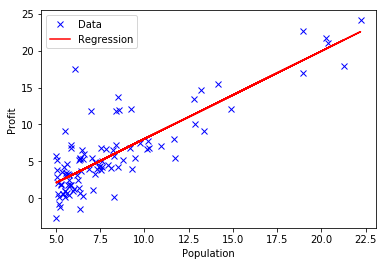

In [16]:
# Plot data and regression line
plt.plot(X, y, 'bx', label='Data')
plt.plot(X, model.predict(X), 'r-', label='Regression')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()

In [20]:
# Training mean squared error
# Using the np.mean() of the difference between the predcted utput and the actual output.n
np.mean((model.predict(X)-y)**2)

8.953942751950358

In [17]:
# Training score
#To get the accuracy of the model we use modeL.score() 
model.score(X,y)

0.7020315537841397

In [21]:
# Predict profit for populations of 35.000 and 70.000 using np.array
model.predict(np.array([[3.5],[7.0]]))*10000 

array([[ 2798.36876352],
       [44554.54631015]])

In [23]:
np.array([[3.5],[7.0]])*10000 

array([[35000.],
       [70000.]])

### Linear regression with multiple variables

In [25]:
# Load data from CSV file
# - column 1: house size in feet**2 (x1)
# - column 2: number of bedrooms (x2)
# - column 3: house price (y)
data =  np.loadtxt("C:/Users/Dell/Desktop/AI/5th workshop/data-20190403T132546Z-001/data/ml-LR/data2.txt",delimiter=",")
data

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

In [31]:
# Separate features (x1, x2) from target (y)
X, y = np.hsplit(data,np.array([2]))

In [27]:
# Number of examples
m = y.size
m

97

In [33]:
# Pipeline components
scaler = StandardScaler()
regr = LinearRegression()

# Pipeline of feature scaler and linear regressor
model = Pipeline([('scaler', scaler), ('regr', regr)])

In [34]:
# Run linear regression on scaled features
model.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

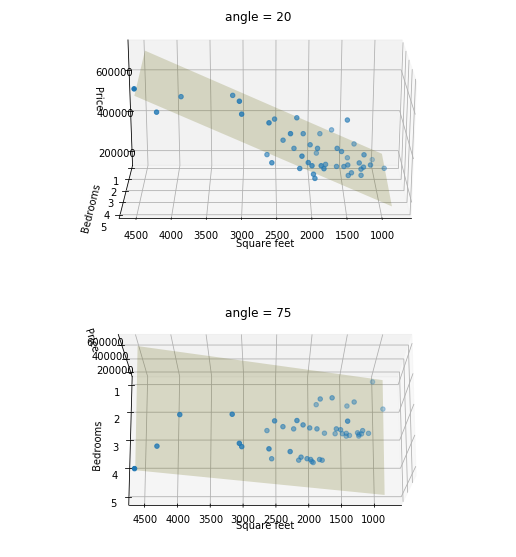

In [35]:
# Create a grid from feature min and max values
grid_range = np.vstack([X.min(axis=0), X.max(axis=0)])
grid = np.meshgrid(grid_range[:,0], grid_range[:,1])

# Compute predictions from grid values
X_grid = np.c_[grid[0].ravel(), grid[1].ravel()]
y_grid = model.predict(X_grid).reshape(grid[0].shape)

def plot_data_and_regression(fig, fignum, view_angle):
    sp = fig.add_subplot(2, 1, fignum, projection='3d')
    sp.view_init(view_angle, 90)
    sp.set_xlabel('Square feet')
    sp.set_ylabel('Bedrooms')
    sp.set_zlabel('Price')
    sp.set_title(f'angle = {view_angle}')
    # Customize tick locators
    sp.yaxis.set_major_locator(ticker.MultipleLocator(1.00))
    sp.zaxis.set_major_locator(ticker.MultipleLocator(200000))
    # Plot examples
    sp.scatter(X[:,0], X[:,1], y)
    # Plot regression area
    sp.plot_surface(grid[0], grid[1], y_grid, color='y', alpha=0.2)

# Create new figure
fig = plt.figure(2, figsize=[9, 10])
 
# Plot data and regression from two different angles
plot_data_and_regression(fig, fignum=1, view_angle=20)
plot_data_and_regression(fig, fignum=2, view_angle=75)

In [36]:
# Training mean squared error
np.mean((model.predict(X) - y) ** 2)

4086560101.205658

In [37]:
# Training score
model.score(X, y)

0.7329450180289141